# Yearly Mean Total Sunspot Number

**Time Range:** 1700 – last elapsed year

---

## Data Description

The yearly mean total sunspot number is obtained by taking a simple arithmetic mean of the daily total sunspot number over all days of each year.

**Note:** In early years, particularly before 1749, the means are computed on only a fraction of the days in each year because on many days, no observation is available.

- A value of `-1` indicates that no number is available (i.e., missing value).

---

## Error Values

The yearly standard deviation of individual data is derived from the daily values using the same formula as the monthly means:

$$
\sigma(m) = \sqrt{\frac{\sum N(d) \cdot \sigma(d)^2}{\sum N(d)}}
$$

Where:

$$
\sigma(d) \text{ is the standard deviation for a single day}
$$

$$
N(d) \text{ is the number of observations for that day}
$$

---

## Standard Error on Yearly Mean

The standard error on the yearly mean values can be computed as:

$$
\text{Standard Error} = \frac{\sigma}{\sqrt{N}}
$$

Where:

$$
\sigma \text{ is the listed standard deviation}
$$

$$
N \text{ is the total number of observations in the year}
$$

**Note:** This standard error measures precision — the sensitivity of the yearly value to different samples of daily values with random errors.  
The uncertainty on the mean (absolute accuracy) is determined only on longer time scales and is not provided for individual yearly values.


### Data Source Attribution

Sunspot data used in this analysis is provided by the **World Data Center SILSO**, Royal Observatory of Belgium, Brussels.

**DOI:** [10.4414/qnza-ac80  
**Website:** https://www.sidc.be/SILSO/infosnytot  
**License:** Creative Commons BY-NC 4.0 (Non-commercial use with attribution)

> Clette, F. & Lefèvre, L. (2015). *SILSO Sunspot Number V2.0*. Published by WDC SILSO - Royal Observatory of Belgium.


### Read the downloaded CSV file into a pandas dataframe

In [46]:
import pandas as pd # Import the pandas library for data manipulation

# Reference for file format: https://www.sidc.be/SILSO/infosnmtot


# The CSV file SN_y_tot_V2.0.csv contains the following columns:
# Column 1: Gregorian calendar year (mid-year date).
# Column 2: Yearly mean total sunspot number.
# Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
# Column 4: Number of observations used to compute the yearly mean total sunspot number.
# Column 5: Definitive/provisional marker. A blank indicates that the value is definitive. 
#           1' indicates that the value is definitive. '0' indicates that the value is still provisional.

# Define expected data types for each column to ensure correct parsing
dtype_spec = {
    "Year": float,                              # Year as a float (e.g., 2020.5)
    "YearlyMeanTotalSunspotNumber": float,      # Average sunspot number for the year
    "YearlyMeanStdDev": float,                  # Standard deviation of sunspot numbers
    "NumObservations": int,                     # Number of observations used
    "DefinitiveMarker": int                     # Marker indicating if data is provisional
}

# Load the CSV file:
# - Use semicolon as delimiter
# - No header row in the file, so manually assign column names
# - Apply the defined data types for consistency
YearlySSN = pd.read_csv(
            'SN_y_tot_V2.0.csv',
             delimiter=';',
             header=None,
             names=list(dtype_spec.keys()),
             dtype=dtype_spec
)

In [48]:
# Convert the 'Year' column to a datetime object (removing any fractional part)
# This ensures compatibility with time series operations and plotting
YearlySSN["Date"] = pd.to_datetime(YearlySSN["Year"].astype(int), format='%Y')

# Set the newly created 'Date' column as the DataFrame index
# This is useful for time-based indexing and analysis
YearlySSN.set_index("Date", inplace=True)

# Sort the DataFrame by the datetime index to ensure chronological order
YearlySSN.sort_index(inplace=True)

# Create a formatted string version of the date for use in Excel or Tableau
# Format: 'DD/MM/YYYY' (e.g., '01/01/2020')
YearlySSN["Date_str"] = YearlySSN.index.strftime("%d/%m/%Y")

### Data Quality Checking

In [78]:
# 1. Check for null values
print("Null values per column:")
print(YearlySSN.isnull().sum())

# 2. Check data types
print("\nData types:")
print(YearlySSN.dtypes)

# 3. Check for duplicate rows
print("\nNumber of duplicate rows:")
print(YearlySSN.duplicated().sum())

# 4. Check for missing data
print("\nMissing sunspot numbers:")
print((YearlySSN["YearlyMeanTotalSunspotNumber"] == -1).sum())

print("\nMissing observation counts:")
print((YearlySSN["NumObservations"] == -1).sum())

print("\nMissing standard deviation counts:")
print((YearlySSN["YearlyMeanStdDev"] == -1).sum())

# 5. Check for years outside expected range
print("\nYear range:")
print(f"{YearlySSN['Year'].min()} to {YearlySSN['Year'].max()}")

# 6. Check for provisional data
print("\nProvisional data counts:")
print((YearlySSN["DefinitiveMarker"] == 0).sum())


Null values per column:
Year                            0
YearlyMeanTotalSunspotNumber    0
YearlyMeanStdDev                0
NumObservations                 0
DefinitiveMarker                0
Date_str                        0
dtype: int64

Data types:
Year                            float64
YearlyMeanTotalSunspotNumber    float64
YearlyMeanStdDev                float64
NumObservations                   int32
DefinitiveMarker                  int32
Date_str                         object
dtype: object

Number of duplicate rows:
0

Missing sunspot numbers:
0

Missing observation counts:
118

Missing standard deviation counts:
118

Year range:
1700.5 to 2024.5

Provisional data counts:
0


In [71]:
# List the years which had missing numbers of observations
missing_obs = YearlySSN[YearlySSN["NumObservations"] == -1]
print(missing_obs[["Year", "NumObservations"]])

              Year  NumObservations
Date                               
1700-01-01  1700.5               -1
1701-01-01  1701.5               -1
1702-01-01  1702.5               -1
1703-01-01  1703.5               -1
1704-01-01  1704.5               -1
...            ...              ...
1813-01-01  1813.5               -1
1814-01-01  1814.5               -1
1815-01-01  1815.5               -1
1816-01-01  1816.5               -1
1817-01-01  1817.5               -1

[118 rows x 2 columns]


## Why Sunspot Numbers Exist but the Number of Observations Is Missing (1700–1817)

The SILSO dataset includes annual sunspot numbers from the year 1700 onwards. However, for the period 1700 to 1817, the column indicating the **number of observations** is marked as `-1`, which signifies missing or unavailable data. This discrepancy arises from the nature of historical record-keeping and the methods used to reconstruct early solar activity.

### Sunspot Numbers: Reconstructed from Historical Records

Although systematic solar observations began in the early 17th century, they were conducted by individual astronomers using varied instruments and methods. These records include:

- Drawings and logs by observers such as Staudacher and Schwabe.
- Written descriptions in scientific publications and personal correspondence.
- Compilations by researchers like Hoyt and Schatten, who developed the Group Sunspot Number series.

These historical sources allowed researchers to estimate sunspot numbers retrospectively. The SILSO team later calibrated and integrated these reconstructions into the modern **International Sunspot Number Version 2.0**, released in 2015.

### Missing Observation Counts: Lack of Standardised Metadata

During the 18th and early 19th centuries, there was no centralised or standardised system for recording solar observations. As a result:

- The **exact number of daily or monthly observations** contributing to each annual sunspot number is often unknown.
- Many original records were incomplete, informal, or have been lost over time.
- The SILSO dataset uses `-1` as a placeholder to indicate that this metadata is missing.

This absence does not affect the availability of sunspot numbers themselves, which are derived from the best available historical evidence.

### Reference

Clette, F., Lefèvre, L., Cagnotti, M., Cortesi, S. and Bulling, A., 2016. *The revised sunspot number: assembling all corrections*. Solar Physics, 291(9-10), pp.2629–2651.


In [73]:
# List the years which had missing standard deviation
missing_std = YearlySSN[YearlySSN["YearlyMeanStdDev"] == -1]
print(missing_std[["Year", "YearlyMeanStdDev"]])

              Year  YearlyMeanStdDev
Date                                
1700-01-01  1700.5              -1.0
1701-01-01  1701.5              -1.0
1702-01-01  1702.5              -1.0
1703-01-01  1703.5              -1.0
1704-01-01  1704.5              -1.0
...            ...               ...
1813-01-01  1813.5              -1.0
1814-01-01  1814.5              -1.0
1815-01-01  1815.5              -1.0
1816-01-01  1816.5              -1.0
1817-01-01  1817.5              -1.0

[118 rows x 2 columns]


This is the same range as the missing number of observations

In [145]:
import numpy as np

# Create a copy to avoid modifying the original DataFrame directly
YearlySSN = YearlySSN.copy()

# Initialise new columns with zeros
YearlySSN["StandardError"] = np.nan
YearlySSN["LowerBound"] = np.nan
YearlySSN["UpperBound"] = np.nan

# Define a mask for valid rows where StdDev is not -1 and Sunspot Number is positive
valid_mask = (
    (YearlySSN["YearlyMeanTotalSunspotNumber"] > 0) &
    (YearlySSN["YearlyMeanStdDev"] != -1)
)

# Compute standard error for valid rows
YearlySSN.loc[valid_mask, "StandardError"] = (
    YearlySSN.loc[valid_mask, "YearlyMeanStdDev"] /
    np.sqrt(YearlySSN.loc[valid_mask, "YearlyMeanTotalSunspotNumber"])
)

# Compute 95% confidence intervals (±1.96 * SE)
YearlySSN.loc[valid_mask, "LowerBound"] = (
    YearlySSN.loc[valid_mask, "YearlyMeanTotalSunspotNumber"] -
    1.96 * YearlySSN.loc[valid_mask, "StandardError"]
)
YearlySSN.loc[valid_mask, "UpperBound"] = (
    YearlySSN.loc[valid_mask, "YearlyMeanTotalSunspotNumber"] +
    1.96 * YearlySSN.loc[valid_mask, "StandardError"]
)

# For invalid rows (StdDev = -1), bounds and SE remain 0.0 as initialized


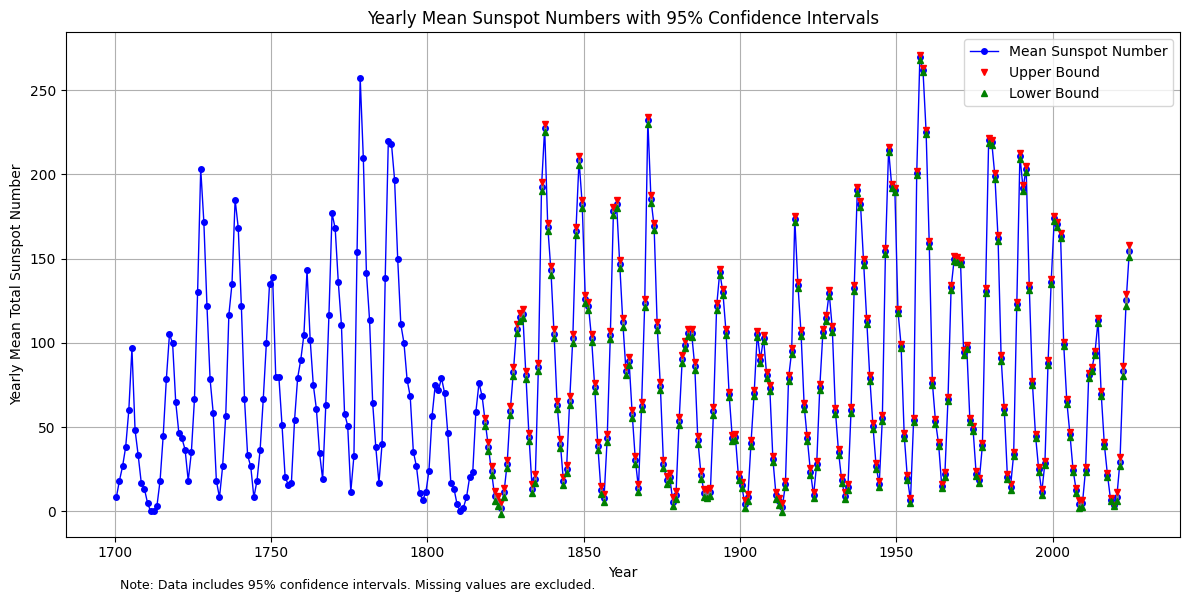

In [185]:
import matplotlib.pyplot as plt

# Extract data
years = YearlySSN["Year"]
means = YearlySSN["YearlyMeanTotalSunspotNumber"]
lower_bounds = YearlySSN["LowerBound"]
upper_bounds = YearlySSN["UpperBound"]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean as a line with dots
plt.plot(years, means, 'o-', label='Mean Sunspot Number', color='blue', linewidth=1, markersize=4)

# Draw vertical drop bars from lower to upper bound
for x, low, high in zip(years, lower_bounds, upper_bounds):
    if not (pd.isna(low) or pd.isna(high)):
        plt.plot([x, x], [low, high], color='grey', linewidth=2)

# Optionally plot markers at the bounds
plt.plot(years, upper_bounds, 'v', label='Upper Bound', color='red', markersize=4)
plt.plot(years, lower_bounds, '^', label='Lower Bound', color='green', markersize=4)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Yearly Mean Total Sunspot Number")
plt.title("Yearly Mean Sunspot Numbers with 95% Confidence Intervals")
plt.figtext(0.5, 0.01, "Note: Data includes 95% confidence intervals. Missing values are excluded.",
            wrap=True, horizontalalignment='right', fontsize=9)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The 95% confidence intervals for the yearly mean sunspot numbers are relatively narrow in comparison to the magnitude of the means themselves. This indicates a high degree of precision in the estimates, with limited statistical uncertainty. In most years, the range between the lower and upper bounds is small, suggesting that the observed variations in sunspot activity are robust and not significantly influenced by sampling error or measurement variability.


### Initial plotting and checking for stationarity

Text(0.5, 1.0, 'Figure 1: Sunspot Numbers 1700 to 2024')

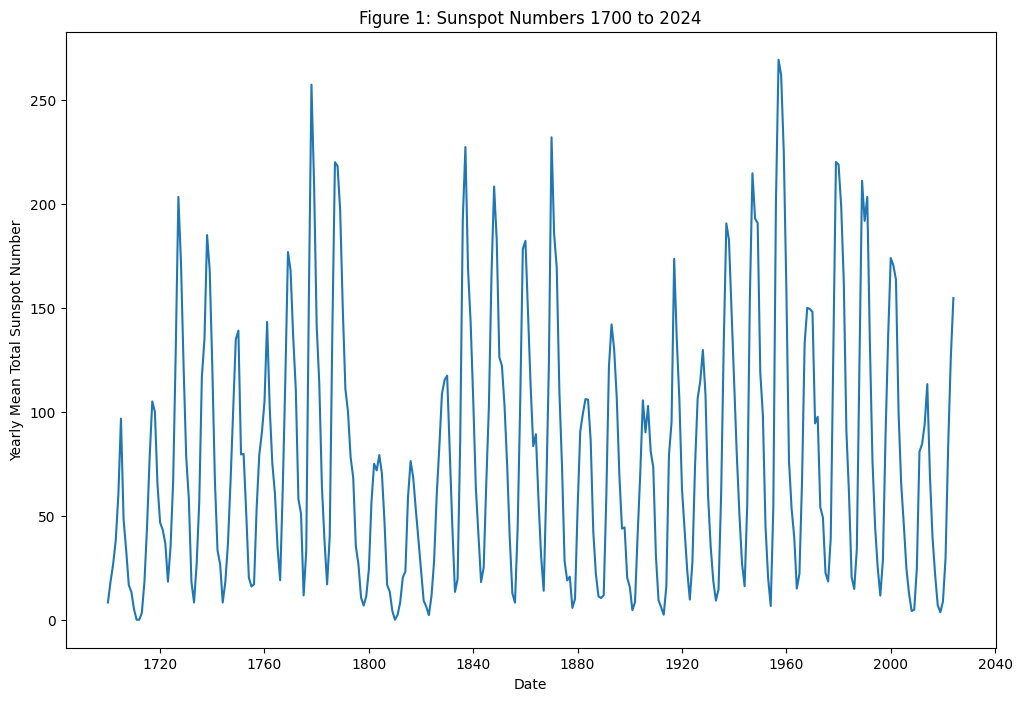

In [23]:
import matplotlib.pyplot as plt  # Import the plotting library

# Create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Set figure size to 12x8 inches

# Plot the yearly mean sunspot numbers against the datetime index
plt.plot(YearlySSN.index, YearlySSN['YearlyMeanTotalSunspotNumber'])

# Label the y-axis to indicate what is being measured
ax.set_ylabel('Yearly Mean Total Sunspot Number')

# Label the x-axis to show the time dimension
ax.set_xlabel('Date')

# Add a title to the plot for context
ax.set_title('Figure 1: Sunspot Numbers 1700 to 2024')

### Stationarity and the Augmented Dickey-Fuller (ADF) Test

#### What is Stationarity?

Stationarity is a fundamental concept in time series analysis. A stationary time series has statistical properties—such as mean, variance, and autocorrelation—that do not change over time. Ensuring stationarity is essential for reliable forecasting using models such as ARIMA or SARIMA.

Key indicators of non-stationarity include:

- **Trend**: A long-term upward or downward movement in the data.
- **Seasonality**: A repeating pattern at regular intervals (e.g. annually, monthly).
- **Changing autocorrelation**: Relationships between observations that vary over time#.

---

### The Augmented Dickey-Fuller (ADF) Test

The ADF test is a statistical method used to determine whether a time series is stationary by testing for the presence of a #unit root.

#### Hypotheses:
- **Null hypothesis (H₀)**: The time series has a unit root → non-stationary
- **Alternative hypothesis (H₁)**: The time series does not have a unit roo#t → stationary

#### Interpreting the p-value:
- **p-value < 0.05**: Reject H₀ → The series is stationary
- **p-value ≥ 0.05**: Fail to reject H₀ → The series is not stationary

This test is particularly useful for natural phenomena such as sunspot cycles, which often exhibit long-term trends or periodic behaviour.

**Reference**: For a detailed guide on the ADF test and its implementation, see [Machine Learning Plus – Augmented Dickey-Fuller Test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)
ented-dickey-fuller-test/).


In [8]:
from statsmodels.tsa.stattools import adfuller  # Import the ADF test function

# Run the Augmented Dickey-Fuller test on the sunspot time series
result = adfuller(YearlySSN['YearlyMeanTotalSunspotNumber'])

# Print the p-value from the test result
print('p-value: ' + str(result[1]))

# Interpret the p-value to determine stationarity
if result[1] < 0.05:
    # If p-value is less than 0.05, reject the null hypothesis (data is stationary)
    print('We reject the null hypothesis. The data is stationary')
else:
    # If p-value is greater than or equal to 0.05, fail to reject the null (data is not stationary)
    print('We fail to reject the null hypothesis. The data is not stationary')

p-value: 0.017052697281071807
We reject the null hypothesis. The data is stationary


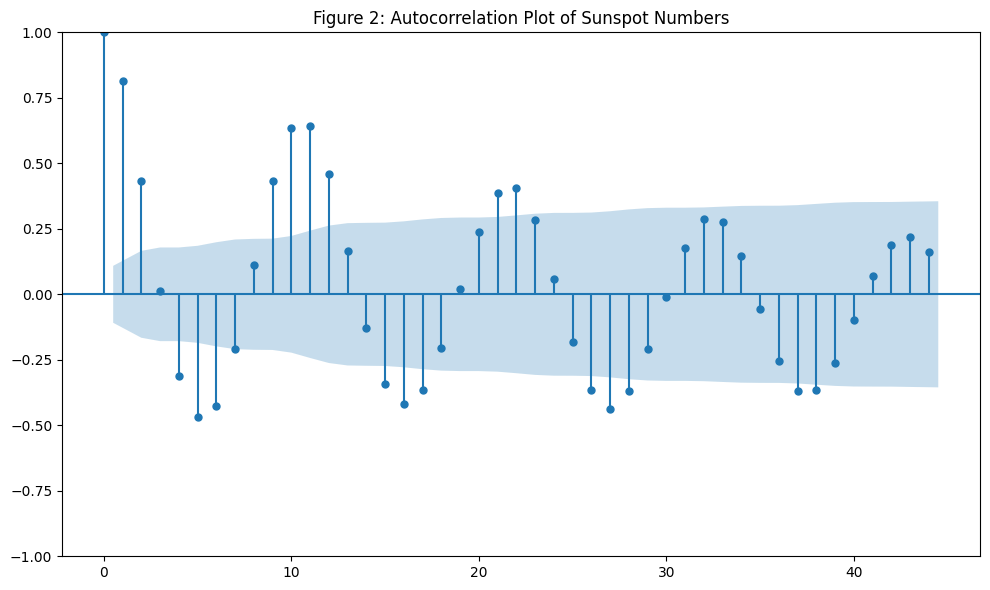

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the autocorrelation function (ACF)
plot_acf(YearlySSN['YearlyMeanTotalSunspotNumber'], lags=44, ax=ax)

# Add a title to the plot
ax.set_title("Figure 2: Autocorrelation Plot of Sunspot Numbers")

# Display the plot
plt.tight_layout()
plt.show()

## Autocorrelation Plot

The autocorrelation plot above displays the correlation of the time series with its own past values (lags). Each vertical line represents the autocorrelation coefficient at a specific lag, with the shaded blue region indicating the 95% confidence interval.

- **Significant spikes** outside the blue region suggest strong autocorrelation at those lags.
- This is useful for identifying **seasonal patterns** or **repeating cycles**, such as the 11-year sunspot cycle.
- If many lags fall outside the confidence bounds, the series may not be white noise and could benefit from AR or MA components in modelling.

This plot helps inform the choice of parameters for ARIMA or SARIMA models.


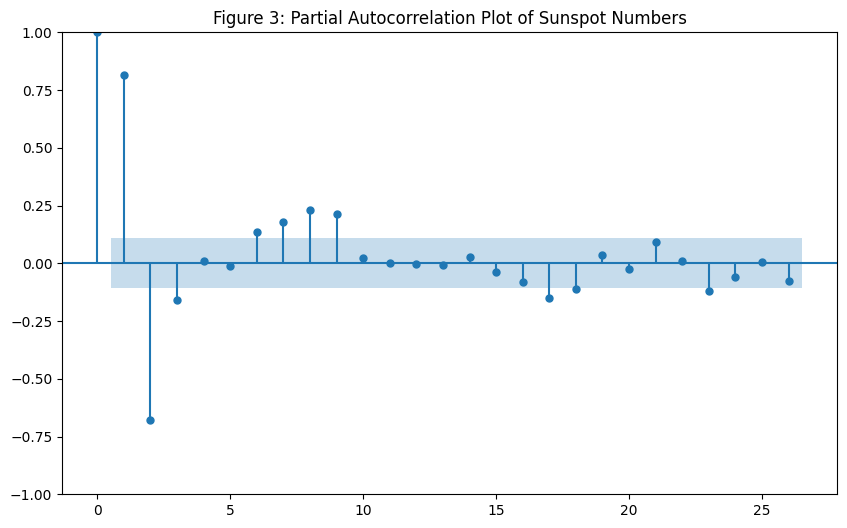

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf  # Import PACF plotting function

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the partial autocorrelation function (PACF) of the sunspot time series
# 'method="ywm"' specifies the Yule-Walker method for estimating PACF
plot_pacf(YearlySSN['YearlyMeanTotalSunspotNumber'], method='ywm', ax=ax)

# Add a title to the plot
ax.set_title("Figure 3: Partial Autocorrelation Plot of Sunspot Numbers")

# Display the plot
plt.show()

## Partial Autocorrelation Function (PACF) Plot

The PACF plot above illustrates the partial autocorrelation of the time series at various lags, controlling for the influence of shorter lags. Each blue dot represents the strength of the direct relationship between the series and its lagged values, while the vertical lines and shaded region indicate the 95% confidence interval.

- **Significant spikes** outside the shaded area suggest that the corresponding lag has a statistically meaningful direct effect and may be a candidate for inclusion as an autoregressive (AR) term.
- This plot is particularly useful for identifying the appropriate number of AR terms in ARIMA or SARIMA models.

In the context of sunspot data, the PACF can help reveal underlying periodic behaviour and guide model selection for forecasting.


### Test-train split

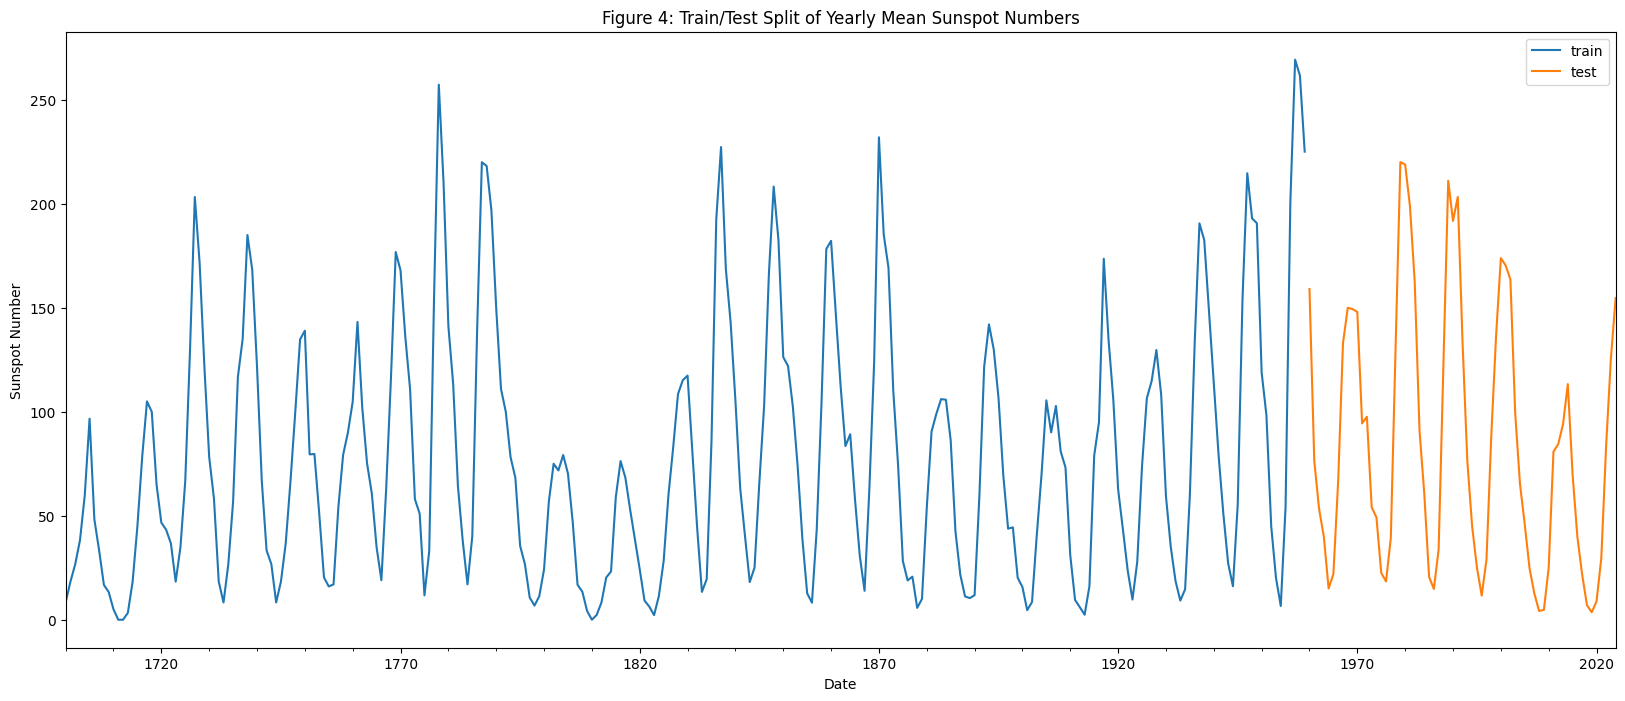

In [14]:
# Calculate the total number of data points in the dataset
total_points = len(YearlySSN)

# Define the training set size as 80% of the total data
train_size = int(0.8 * total_points)

# Split the dataset into training and test sets using index slicing
train = YearlySSN.iloc[0:train_size]   # First 80% for training
test = YearlySSN.iloc[train_size:]     # Remaining 20% for testing

# Create a plot to visualise the train/test split
fig, ax = plt.subplots(figsize=(20, 8))  # Set a wide figure size for clarity

# Add axis labels and a title
ax.set_title("Figure 4: Train/Test Split of Yearly Mean Sunspot Numbers")
ax.set_xlabel("Year")
ax.set_ylabel("Sunspot Number")

# Plot the training data
train['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='train')

# Plot the test data
test['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='test')

# Add a legend to distinguish between train and test sets
plt.legend()

# Display the plot
plt.show()

# Model selection

## Mean-Based Naive Forecasting

In this approach, naive forecasting assumes that future values will remain consistent with the average of past observations. It provides a simple benchmark: if a more sophisticated model predicts significantly worse performance (e.g. lower sales, demand, or customer numbers) than this average, it may signal a problem that warrants further investigation.

---

### Advantages of Mean-Based Naive Forecasting

- Easy to implement and interpret  
- Offers a stable baseline for comparing more complex models  
- Less sensitive to short-term fluctuations than last-value forecasting  

---

### Disadvantages of Mean-Based Naive Forecasting

- Assumes data is stationary and lacks trends or seasonality  
- May underperform when the underlying data shows clear upward or downward movement  
- Ignores recent changes or patterns in the data  

---

## Is a Naive Forecast Worth Doing?

Even though a naive forecast ignores seasonality and autocorrelation, it can still be useful — depending on your goals.

### When a Naive Forecast *Is* Worth Doing

- **Benchmarking**: It sets a minimum performance threshold. If your model cannot outperform a naive forecast, it may be mis-specified or overfitting.
- **Model Comparison**: It helps quantify how much better your chosen model (e.g. SARIMA) performs.
- **Communication**: It is easy to explain to non-technical stakeholders — for example, "Our model improves forecast accuracy by X% over a simple average."

### When It Is *Not* Worth Doing

- If the data clearly shows **strong autocorrelation** and **seasonality**, and you are using models that explicitly account for these (such as SARIMA), then:
  - The naive forecast is unlikely to be competitive.
  - It may not provide meaningful insight for model selection.

---

### Summary

Yes, it is worth doing — but only as a baseline.  
It is not meant to be competitive, just a reference point to show that your chosen model adds value by capturing the structure that the naive method ignores.


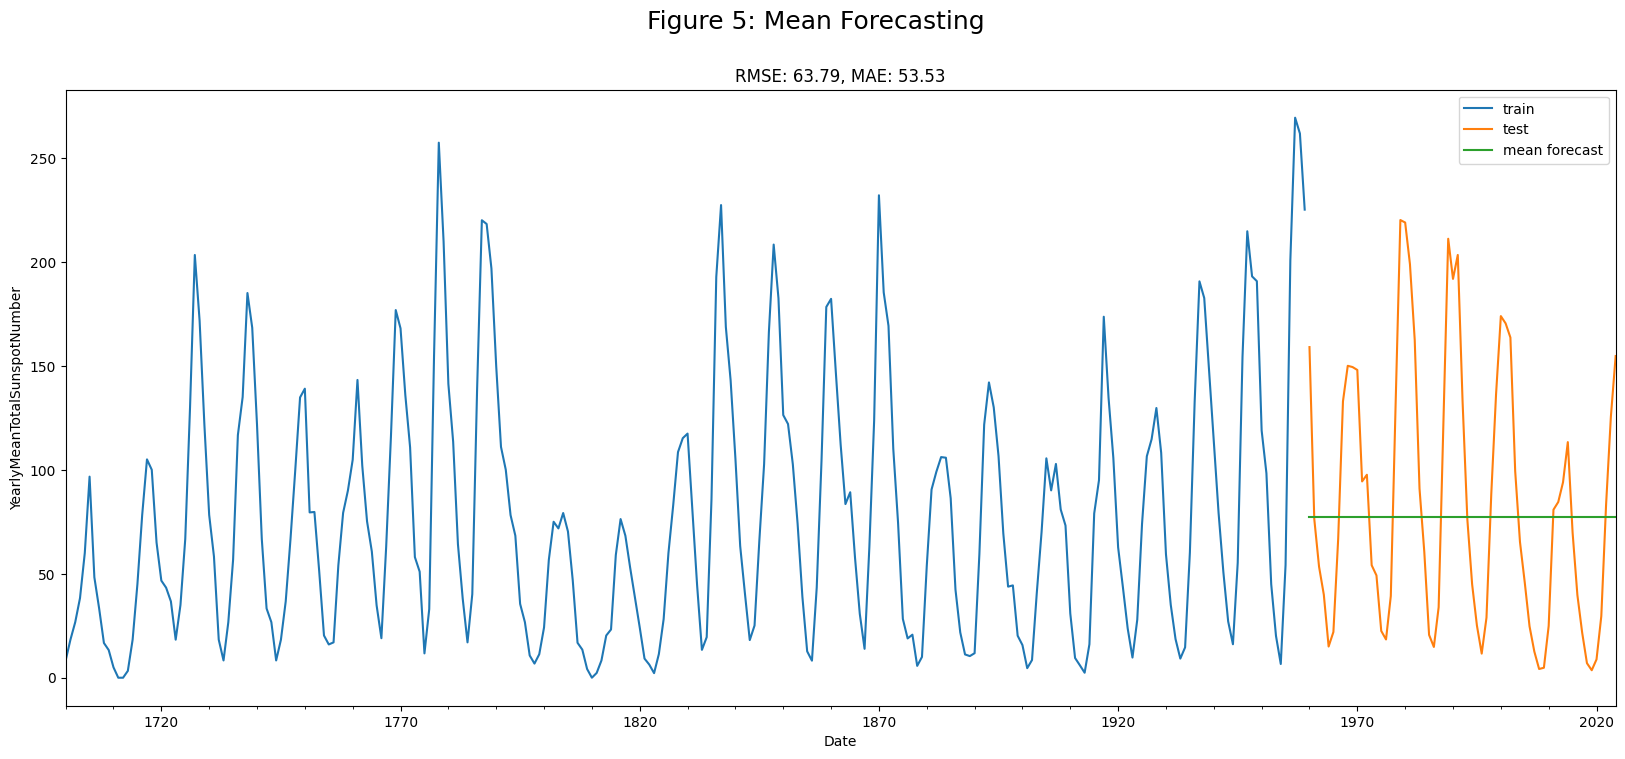

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the mean of the training set
mean_value = train["YearlyMeanTotalSunspotNumber"].mean()

# Apply the mean forecast to the test set
test_mean = test.copy()
test_mean["predicted"] = mean_value  # Every prediction is the same: the training mean

# Calculate error metrics
rmse_mean = round(np.sqrt(mean_squared_error(test_mean["YearlyMeanTotalSunspotNumber"], test_mean["predicted"])), 2)

mae_mean = round(mean_absolute_error(test_mean["YearlyMeanTotalSunspotNumber"], test_mean["predicted"]), 2)

# Plot the actual vs predicted values
fig, ax = plt.subplots(figsize=(20, 8))

# Plot training data
train["YearlyMeanTotalSunspotNumber"].plot(ax=ax, label="train")

# Plot test data
test_mean["YearlyMeanTotalSunspotNumber"].plot(ax=ax, label="test")

# Plot mean forecast
test_mean["predicted"].plot(ax=ax, label="mean forecast")

# Add legend and titles
plt.legend()
plt.title(f"RMSE: {rmse_mean}, MAE: {mae_mean}")
plt.suptitle("Figure 5: Mean Forecasting", fontsize=18)
plt.ylabel("YearlyMeanTotalSunspotNumber")
plt.show()

## Why Holt-Winters Exponential Smoothing Is Not Suitable for Sunspot Data

### Limitations of Holt-Winters

1. **Strong Autocorrelation**  
   The raw sunspot data exhibits significant autocorrelation across multiple lags, particularly around the 11-year cycle. Holt-Winters assumes residuals are uncorrelated, making it unsuitable for data with long memory or autocorrelated errors.

2. **Irregular Cycles**  
   Sunspot activity follows a quasi-periodic cycle — not strictly additive or multiplicative. Holt-Winters performs best with stable, regular seasonal patterns, which this data does not exhibit.

3. **Underfitting Risk**  
   Holt-Winters lacks autoregressive and moving average components, which can lead to underfitting. This results in poor forecasts and residuals that still contain structure.

4. **SARIMA is More Appropriate**  
   SARIMA explicitly models autocorrelation and seasonality, making it better suited for time series such as sunspots that exhibit cyclical behaviour and correlated errors.

---

### Conclusion

Holt-Winters is not recommended for forecasting sunspot data due to its inability to handle autocorrelation and irregular cycles. SARIMA provides a more robust framework for capturing the underlying structure of the data.
cture of the data.


## Seasonal Autoregressive Integrated Moving Average (SARIMA)

### Introduction to ARIMA

ARIMA (Autoregressive Integrated Moving Average) is a popular model for forecasting time series data. It combines:
- **Autoregression (AR)**: Uses past values to predict future ones.
- **Integration (I)**: Applies differencing to make the series stationary.
- **Moving Average (MA)**: Models the relationship between an observation and past forecast errors.

ARIMA is suitable for data with trends but **not** for data with seasonal patterns.

---

### Why SARIMA?

SARIMA extends ARIMA by incorporating seasonal components, making it suitable for time series data that exhibit regular cycles. It models the next value in the sequence based on:
- Differenced observations
- Error terms
- Seasonal differences

In this case, the sunspot data **did exhibit seasonality**, so ARIMA was not appropriate. SARIMA was chosen to account for the 11-year cycle observed in the data.

---

### Advantages of SARIMA

- Effective at identifying patterns in time series data based on differences in observations  
- Accounts for seasonality in the data  

---

### SARIMA Parameters

SARIMA requires two sets of parameters:

- **ARIMA order**: `(p, d, q)`
  - `p`: Number of autoregressive terms
  - `d`: Number of non-seasonal differences
  - `q`: Number of moving average terms

- **Seasonal order**: `(P, D, Q, M)`
  - `P`: Seasonal autoregressive order
  - `D`: Number of seasonal differences
  - `Q`: Seasonal moving average order
  - `M`: Number of observations per season (e.g. 11 for yearly sunspot data with an 11-year cycle)

Together, these parameters allow SARIMA to model both short-term and seasonal patterns in the data.

---


## SARIMA Model Summary

The raw time series data was found to be **stationary**, so no differencing was applied:

- **d = 0** (no trend differencing)  
- **D = 0** (no seasonal differencing)

---

## Identifying AR and MA Terms

To determine the SARIMA model's **non-seasonal** parameters (**p, d, q**):

- **p (AR term)**: Based on the Partial Autocorrelation Function (PACF) plot (Figure 3), there are **three significant non-zero lags**, so **p = 3**
- **q (MA term)**: Based on the Autocorrelation Function (ACF) plot (Figure 2), there are **two significant non-zero lags**, so **q = 2**

---

## Identifying Seasonal Parameters

To determine the **seasonal** components (**P, D, Q, s**) of the SARIMA model:

- **Seasonal period (s)**: The data exhibits a clear seasonal cycle every **11 time steps**, so **s = 11**

- **P (Seasonal AR term)**: By examining the **PACF plot (Figure 3)** at seasonal lags (e.g. lag 11), there is **one significant seasonal lag**, so **P = 1**

- **Q (Seasonal MA term)**: By examining the **ACF plot (Figure 2)** at seasonal lags (e.g. lag 11), there is **one significant seasonal lag**, so **Q = 1**

- **D (Seasonal differencing)**: As the seasonal pattern is stable and the data is stationary, **D = 0**

> **Note**: The seasonal parameters are estimated by interpreting the **same ACF and PACF plots** used for non-seasonal analysis, but focusing specifically on **seasonal lags** (multiples of the seasonal period).

---

## Final SARIMA Model Parameters

**SARIMA(p, d, q)(P, D, Q)[s] = (3, 0, 2)(1, 0, 1)[11]**

This model captures both the short-term autocorrelation and the seasonal structure present in the stationary time series.


In [21]:
# Ensure the training data has a consistent frequency (e.g., yearly)
train = train.asfreq(train.index.inferred_freq)

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model with specified order and seasonal_order
# order=(3,0,2): AR(3), no differencing, MA(2)
# seasonal_order=(1,0,1,11): seasonal AR(1), no seasonal differencing, seasonal MA(1), seasonality of 11 years
sarima = SARIMAX(
    train['YearlyMeanTotalSunspotNumber'],
    order=(3, 0, 2),
    seasonal_order=(1, 0, 1, 11)
).fit(maxiter=1000, disp=True)

# Check if the model successfully converged
if not sarima.mle_retvals['converged']:
    print("Convergence failed. Adjust parameters or data.")
else:
    print("Convergence successful!")

Convergence successful!


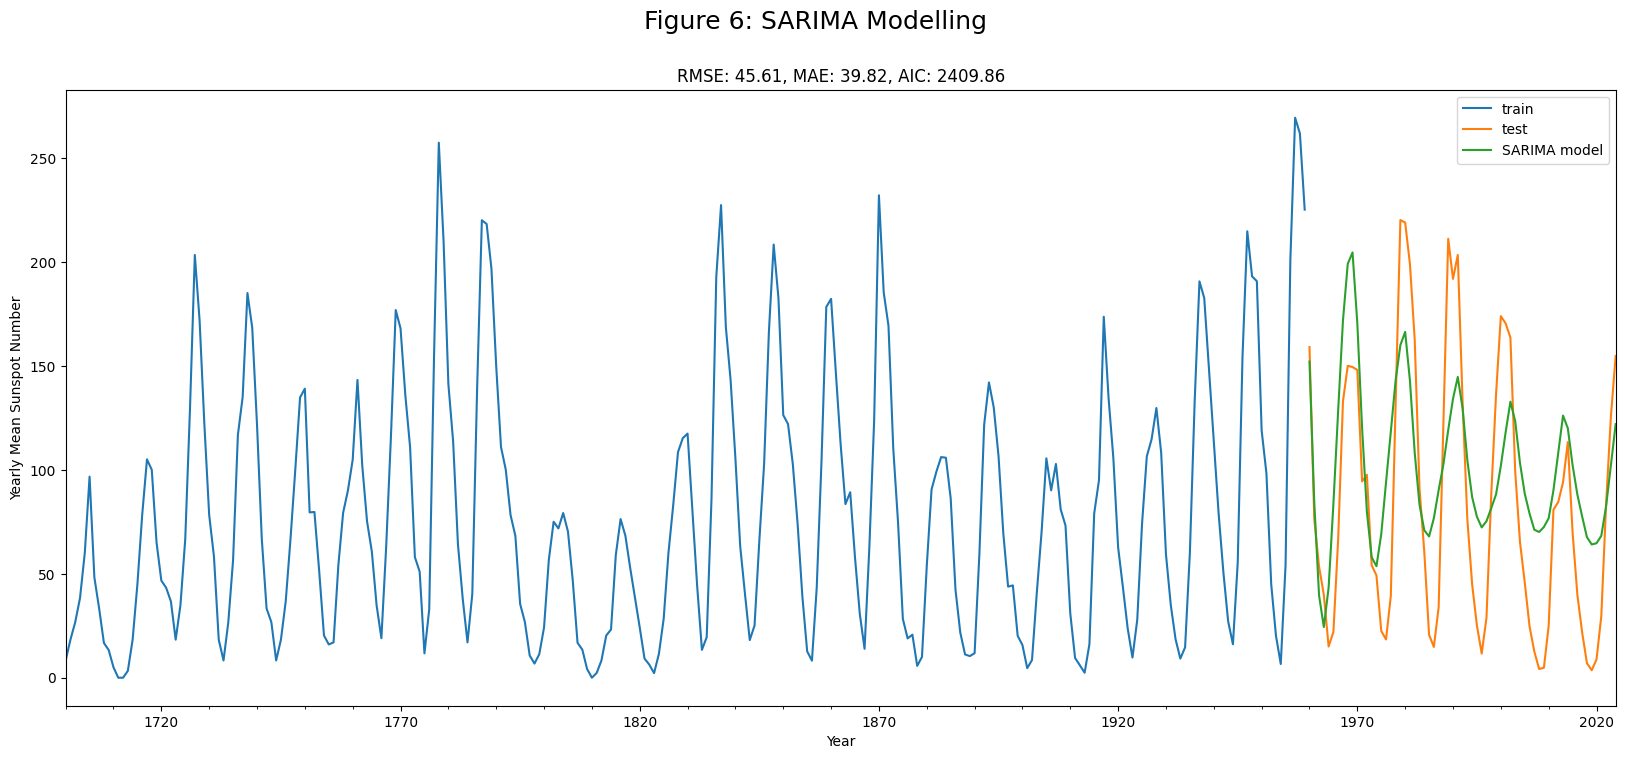

In [22]:
# Create a copy of the test set for SARIMA predictions
test_sarima = test.copy()

# Generate predictions using the SARIMA model
# 'start' and 'end' define the forecast range based on the test set's index
test_sarima['predicted'] = sarima.predict(start=test_sarima.index[0], end=test_sarima.index[-1])

# Calculate error metrics and round to 2 decimal places
# RMSE is Root Mean Squared Error
# MAE is Mean Absolute Error
rmse_sarima = round(np.sqrt(mean_squared_error(test_sarima['YearlyMeanTotalSunspotNumber'], test_sarima['predicted'])), 2)
mae_sarima = round(mean_absolute_error(test_sarima['YearlyMeanTotalSunspotNumber'], test_sarima['predicted']), 2)

# Extract AIC (Akaike Information Criterion) from the fitted model
# It is a widely-used metric for model selection in time series and statistical modelling.
# It helps in comparing different models and choosing the one that best balances goodness of fit with model complexity.
aic_sarima = round(sarima.aic, 2)

# Plot actual vs predicted values
fig, ax = plt.subplots(figsize=(20, 8))

# Plot training data
train['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='train')

# Plot test data
test_sarima['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='test')

# Plot SARIMA forecast
test_sarima['predicted'].plot(ax=ax, label='SARIMA model')

# Add legend and titles
plt.legend()
plt.title(f'RMSE: {rmse_sarima}, MAE: {mae_sarima}, AIC: {aic_sarima}')
plt.suptitle("Figure 6: SARIMA Modelling", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Yearly Mean Sunspot Number')
plt.show()

## Forward facing SARIMA modelling

C:\Users\TrevorPoole\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


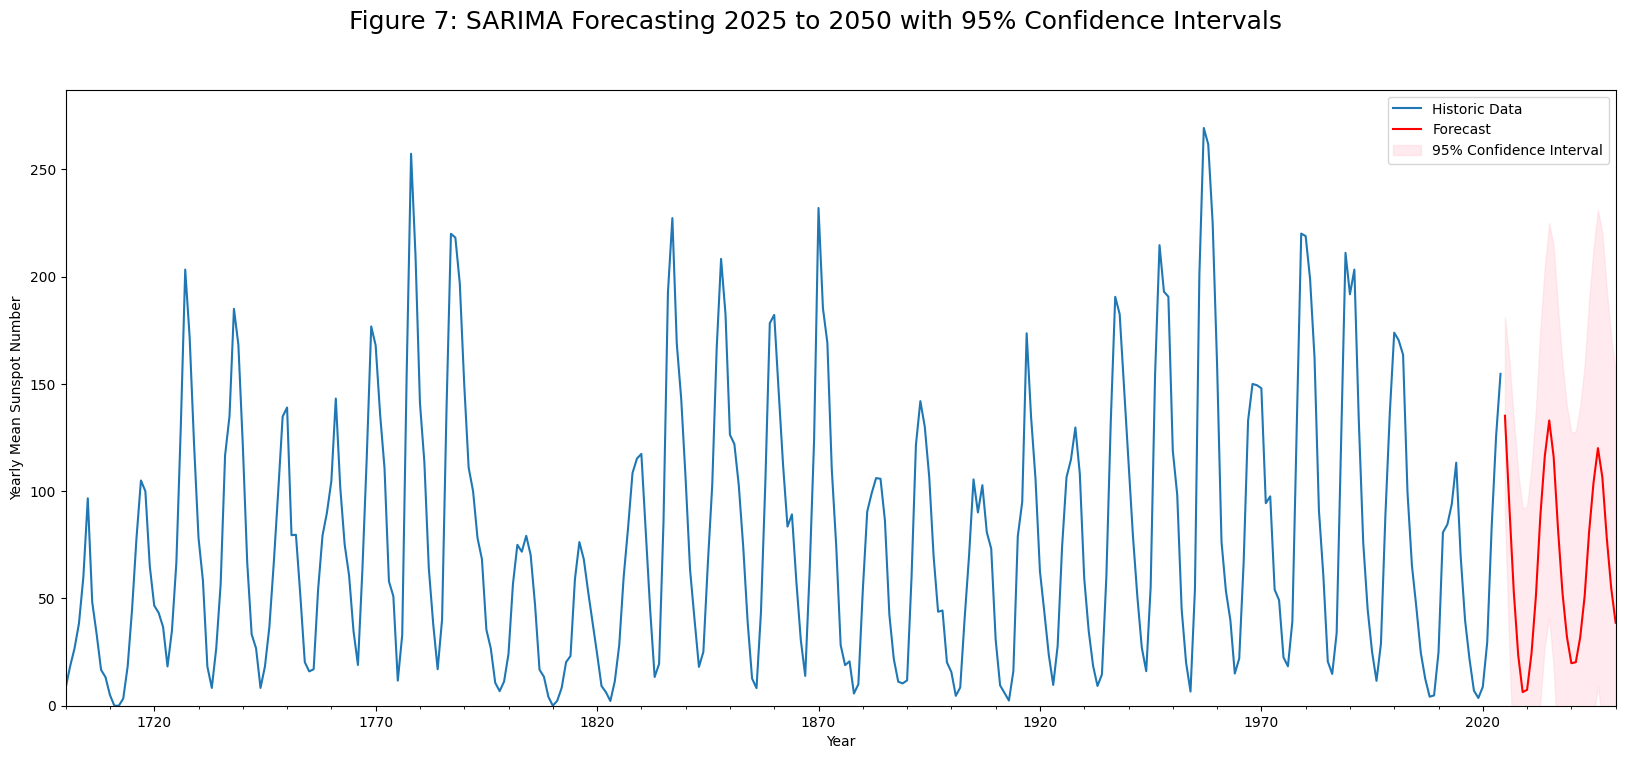

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the time series data is set to yearly frequency starting in January
YearlySSN = YearlySSN.asfreq('AS-JAN')

# Fit the SARIMA model
sarima = SARIMAX(
    YearlySSN['YearlyMeanTotalSunspotNumber'], 
    order=(3, 0, 2), 
    seasonal_order=(1, 0, 1, 11)
).fit(maxiter=1000, disp=True)

# Get forecast object for 2025 to 2050
forecast_obj = sarima.get_forecast(steps=26)

# Extract predicted mean and confidence intervals
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=0.05)

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot historical data
YearlySSN['YearlyMeanTotalSunspotNumber'].plot(ax=ax, label='Historic Data')

# Plot forecasted values
forecast_mean.plot(ax=ax, label='Forecast', color='red')

# Plot confidence intervals
ax.fill_between(
    forecast_mean.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

# Force y-axis to start at zero
ax.set_ylim(bottom=0)


# Add labels and legend
plt.legend()
plt.suptitle("Figure 7: SARIMA Forecasting 2025 to 2050 with 95% Confidence Intervals", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Yearly Mean Sunspot Number')
plt.show()


In [25]:
import pmdarima as pm

# Use auto_arima to automatically identify the best SARIMA model parameters
# for the given time series: YearlyMeanTotalSunspotNumber

arima_model = pm.auto_arima(
    YearlySSN['YearlyMeanTotalSunspotNumber'],  # The time series data to model
    start_p=0, start_q=0,                       # Starting values for AR (p) and MA (q) terms
    max_p=5, max_q=5,                           # Maximum values for AR and MA terms to search
    start_P=0, start_Q=0,                       # Starting values for seasonal AR (P) and MA (Q)
    max_P=2, max_Q=2,                           # Maximum values for seasonal AR and MA terms
    stepwise=True,                              # Use stepwise search to reduce computation time
    seasonal=True,                              # Enable seasonal modeling
    m=11,                                       # Seasonal period (11 years for sunspot cycle)
    trace=True,                                 # Print progress and model selection steps
    error_action='ignore',                      # Silently skip models that fail to fit
    suppress_warnings=True,                     # Suppress convergence warnings
    trend='c'                                   # Include a constant term (important if d=0 and mean ≠ 0)
)

# Note: m=11 is used to reflect the known 11-year sunspot cycle.


# Print the best model summary and AIC
print(f"Best model: {arima_model.summary()}")
print(f"AIC of best model: {arima_model.aic()}")


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=3607.597, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=3143.130, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=3230.724, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=3607.597, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[11] intercept   : AIC=3251.485, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[11] intercept   : AIC=3137.641, Time=0.59 sec
 ARIMA(1,0,0)(2,0,1)[11] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(1,0,0)(1,0,1)[11] intercept   : AIC=3135.892, Time=0.35 sec
 ARIMA(1,0,0)(0,0,1)[11] intercept   : AIC=3177.566, Time=0.26 sec
 ARIMA(1,0,0)(1,0,2)[11] intercept   : AIC=3137.872, Time=0.88 sec
 ARIMA(1,0,0)(0,0,2)[11] intercept   : AIC=3162.478, Time=0.59 sec
 ARIMA(1,0,0)(2,0,2)[11] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(1,0,1)[11] intercept   : AIC=3433.635, Time=0.38 sec
 ARIMA(2,0,0)(1,0,1)[11] intercept   : AIC=3025.486, Time=0.54 sec
 ARIMA(2,0,0)(0,0,1)[11] inte

### The AIC of the best model is greater than the one produced by manually selecting the parameters

This suggests that the manually selected model may be better in terms of balancing fit and complexity.
The automated model selection might have chosen a model that fits the data well but is too complex, leading to a higher AIC.Ther manual model might be simpler but still fits the data well enough, resulting in a lower AIC.


In [27]:
# Ensure the training data has a consistent frequency (e.g., yearly)
train = train.asfreq(train.index.inferred_freq)

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model with specified order and seasonal_order
# order=(3,0,0): AR(3), no differencing, MA(0)
# seasonal_order=(1,0,1,11): seasonal AR(1), no seasonal differencing, seasonal MA(1), seasonality of 11 years
sarima = SARIMAX(
    train['YearlyMeanTotalSunspotNumber'],
    order=(3, 0, 0),
    seasonal_order=(1, 0, 1, 11)
).fit(maxiter=1000, disp=True)

# Check if the model successfully converged
if not sarima.mle_retvals['converged']:
    print("Convergence failed. Adjust parameters or data.")
else:
    print("Convergence successful!")
    
# Create a copy of the test set for SARIMA predictions
test_sarima = test.copy()

# Generate predictions using the SARIMA model
# 'start' and 'end' define the forecast range based on the test set's index
test_sarima['predicted'] = sarima.predict(start=test_sarima.index[0], end=test_sarima.index[-1])

# Calculate error metrics and round to 2 decimal places
# RMSE is Root Mean Squared Error
# MAE is Mean Absolute Error
rmse_sarima = round(np.sqrt(mean_squared_error(test_sarima['YearlyMeanTotalSunspotNumber'], test_sarima['predicted'])), 2)
mae_sarima = round(mean_absolute_error(test_sarima['YearlyMeanTotalSunspotNumber'], test_sarima['predicted']), 2)

print(f'RMSE: {rmse_sarima}, MAE: {mae_sarima}')

Convergence successful!
RMSE: 49.47, MAE: 37.53


This compares to RMSE 45.61 MAE 39.82 for the manual model

In [30]:
import pandas as pd

# Step 1: Extract historical data
historical_df = YearlySSN.loc['1700':'2024'].reset_index()
historical_df['Year'] = historical_df.iloc[:, 0].dt.year
historical_df = historical_df[['Year', 'YearlyMeanTotalSunspotNumber']]
historical_df.columns = ['Year', 'SunspotNumber']

# Step 2: Extract forecast data
forecast_df = forecast_mean.loc['2025':'2050'].reset_index()
forecast_df['Year'] = forecast_df.iloc[:, 0].dt.year
forecast_df['SunspotNumber'] = forecast_df.iloc[:, 1]
forecast_df = forecast_df[['Year', 'SunspotNumber']]

# Step 3: Combine both
combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)

# Step 4: Round sunspot numbers to one decimal place
combined_df['SunspotNumber'] = combined_df['SunspotNumber'].round(1)

# Step 5: Export to Excel
combined_df.to_excel('Sunspot_History_and_Forecast_1700_2050.xlsx', index=False)
